# Feature Engineering(Rajshahi-2018 Dataset) 

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aqi_data = pd.read_csv("F:\\CLASS\\CSE498R(Directed Research)\\Dataset\\Rajshahi\\real_2018.csv")

In [3]:
aqi_data.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.4,24.5,14,1011.8,81,5.6,3.3,5.4,NaN,NaN
1,2,14.2,18.4,11.4,1012.1,88,4.3,5,7.6,NaN,NaN
2,3,14.8,23.6,10.6,1012.8,71,5,4.1,7.6,391.0,EU
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,VU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.0,VU


In [4]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   D         365 non-null    object 
 1   T         226 non-null    object 
 2   TM        226 non-null    object 
 3   Tm        226 non-null    object 
 4   SLP       226 non-null    object 
 5   H         226 non-null    object 
 6   VV        226 non-null    object 
 7   V         226 non-null    object 
 8   VM        226 non-null    object 
 9   AQI       295 non-null    float64
 10  Category  295 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.5+ KB


In [5]:
pd.options.display.max_columns = None
display(aqi_data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.4,24.5,14,1011.8,81,5.6,3.3,5.4,NaN,NaN
1,2,14.2,18.4,11.4,1012.1,88,4.3,5,7.6,NaN,NaN
2,3,14.8,23.6,10.6,1012.8,71,5,4.1,7.6,391.0,EU
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,VU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.0,VU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,-,-,-,-,-,-,-,-,208.0,VU
361,28,-,-,-,-,-,-,-,-,187.0,U
362,29,-,-,-,-,-,-,-,-,210.0,VU
363,30,-,-,-,-,-,-,-,-,239.0,VU


In [6]:
aqi_data.isnull().sum()

D             0
T           139
TM          139
Tm          139
SLP         139
H           139
VV          139
V           139
VM          139
AQI          70
Category     70
dtype: int64

In [7]:
aqi = aqi_data.replace("-",np.nan)
aqi

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.4,24.5,14,1011.8,81,5.6,3.3,5.4,NaN,NaN
1,2,14.2,18.4,11.4,1012.1,88,4.3,5,7.6,NaN,NaN
2,3,14.8,23.6,10.6,1012.8,71,5,4.1,7.6,391.0,EU
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,VU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.0,VU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0,VU
361,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.0,U
362,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,VU
363,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,VU


In [8]:
aqi.isnull().sum()

D             0
T           213
TM          213
Tm          213
SLP         213
H           213
VV          213
V           213
VM          213
AQI          70
Category     70
dtype: int64

<AxesSubplot:>

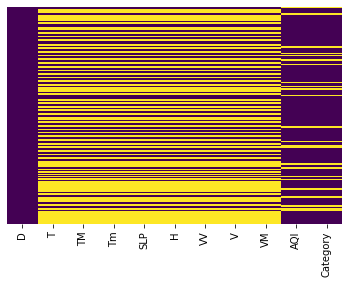

In [9]:
sns.heatmap(aqi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

------------------------------------

### 
T = Average Temperature (°C) , TM = Maximum temperature (°C), 

Tm = Minimum temperature (°C), SLP= Atmospheric pressure at sea level (hPa), 

H = Average relative humidity (%), VV = Average visibility (Km),

V = Average wind speed (Km/h), VM = Maximum sustained wind speed (Km/h), AQI = Air Quality Index


## Convert object type as float type

In [10]:
aqi['T'] = aqi['T'].replace({'NAN':np.nan}).astype(float)
aqi['TM'] = aqi['TM'].replace({'NAN':np.nan}).astype(float)
aqi['Tm'] = aqi['Tm'].replace({'NAN':np.nan}).astype(float)
aqi['SLP'] = aqi['SLP'].replace({'NAN':np.nan}).astype(float)
aqi['H'] = aqi['H'].replace({'NAN':np.nan}).astype(float)
aqi['VV'] = aqi['VV'].replace({'NAN':np.nan}).astype(float)
aqi['V'] = aqi['V'].replace({'NAN':np.nan}).astype(float)
aqi['VM'] = aqi['VM'].replace({'NAN':np.nan}).astype(float)

------

# Month-1(January)

Find monthly mean

In [11]:
df1 = aqi.iloc[0:31,0:11]
df1.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.4,24.5,14.0,1011.8,81.0,5.6,3.3,5.4,NaN,NaN
1,2,14.2,18.4,11.4,1012.1,88.0,4.3,5.0,7.6,NaN,NaN
2,3,14.8,23.6,10.6,1012.8,71.0,5.0,4.1,7.6,391.0,EU
28,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.0,EU
29,30,15.6,24.1,8.4,1012.5,75.0,5.0,1.9,7.6,337.0,EU
30,31,16.5,24.2,10.5,1012.3,78.0,5.3,1.9,7.6,337.0,EU


In [12]:
df1.isnull().sum()

D            0
T           20
TM          20
Tm          20
SLP         20
H           20
VV          20
V           20
VM          20
AQI          5
Category     5
dtype: int64

In [13]:
df1["T"] = df1["T"].fillna(value=df1["T"].mean())
df1["TM"] = df1["TM"].fillna(value=df1["TM"].mean())
df1["Tm"] = df1["Tm"].fillna(value=df1["Tm"].mean())
df1["SLP"] = df1["SLP"].fillna(value=df1["SLP"].mean())
df1["H"] = df1["H"].fillna(value=df1["H"].mean())
df1["VV"] = df1["VV"].fillna(value=df1["VV"].mean())
df1["V"] = df1["V"].fillna(value=df1["V"].mean())
df1["VM"] = df1["VM"].fillna(value=df1["VM"].mean())
df1["AQI"] = df1["AQI"].fillna(value=df1["AQI"].mean())

----------

In [14]:
df1.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.4,24.500000,14.000000,1011.800000,81.000000,5.600000,3.300000,5.400000,284.923077,NaN
1,2,14.2,18.400000,11.400000,1012.100000,88.000000,4.300000,5.000000,7.600000,284.923077,NaN
2,3,14.8,23.600000,10.600000,1012.800000,71.000000,5.000000,4.100000,7.600000,391.000000,EU
3,4,14.9,22.290909,9.654545,1013.109091,80.818182,4.936364,2.736364,5.854545,261.000000,VU
4,5,14.9,22.290909,9.654545,1013.109091,80.818182,4.936364,2.736364,5.854545,219.000000,VU


In [15]:
df1.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    5
dtype: int64

# Month-2 (February)

In [16]:
df2 = aqi.iloc[31:59,0:11]
df2.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,18.7,24.8,11.0,1012.2,71.0,4.8,1.5,3.5,351.0,EU
32,2,18.3,24.4,13.0,1012.6,82.0,4.7,0.6,1.9,392.0,EU
33,3,18.6,26.8,11.8,1013.2,81.0,4.7,0.7,3.5,361.0,EU
56,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,U
57,27,23.6,29.8,18.5,1011.8,78.0,5.3,3.5,5.4,185.0,U
58,28,23.3,30.7,17.3,1011.4,76.0,5.5,1.5,5.4,105.0,C


In [17]:
df2.isnull().sum()

D            0
T           14
TM          14
Tm          14
SLP         14
H           14
VV          14
V           14
VM          14
AQI          0
Category     0
dtype: int64

In [18]:
df2["T"] = df2["T"].fillna(value=df2["T"].mean())
df2["TM"] = df2["TM"].fillna(value=df2["TM"].mean())
df2["Tm"] = df2["Tm"].fillna(value=df2["Tm"].mean())
df2["SLP"] = df2["SLP"].fillna(value=df2["SLP"].mean())
df2["H"] = df2["H"].fillna(value=df2["H"].mean())
df2["VV"] = df2["VV"].fillna(value=df2["VV"].mean())
df2["V"] = df2["V"].fillna(value=df2["V"].mean())
df2["VM"] = df2["VM"].fillna(value=df2["VM"].mean())

-------------------------------

In [19]:
df2.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,18.700000,24.800000,11.000000,1012.20,71.000000,4.800000,1.500000,3.5,351.0,EU
32,2,18.300000,24.400000,13.000000,1012.60,82.000000,4.700000,0.600000,1.9,392.0,EU
33,3,18.600000,26.800000,11.800000,1013.20,81.000000,4.700000,0.700000,3.5,361.0,EU
34,4,20.292857,28.057143,13.842857,1013.15,71.428571,5.485714,1.914286,5.5,356.0,EU
35,5,20.292857,28.057143,13.842857,1013.15,71.428571,5.485714,1.914286,5.5,316.0,EU


In [20]:
df2.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

----------------------------------------

# Month-3(March)

In [22]:
df3 = aqi.iloc[59:90,0:11]
df3.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
59,Mar-01,23.9,31.5,18.1,1010.4,72.0,5.5,1.9,7.6,200.0,U
60,2,24.7,33.4,18.4,1007.8,67.0,6.1,2.4,5.4,237.0,VU
61,3,24.9,34.0,18.8,1006.3,56.0,6.0,3.3,7.6,164.0,U
87,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,31,24.9,31.0,18.5,1010.2,67.0,5.6,9.1,13.0,NaN,NaN


In [23]:
df3.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI         11
Category    11
dtype: int64

In [24]:
df3["T"] = df3["T"].fillna(value=df3["T"].mean())
df3["TM"] = df3["TM"].fillna(value=df3["TM"].mean())
df3["Tm"] = df3["Tm"].fillna(value=df3["Tm"].mean())
df3["SLP"] = df3["SLP"].fillna(value=df3["SLP"].mean())
df3["H"] = df3["H"].fillna(value=df3["H"].mean())
df3["VV"] = df3["VV"].fillna(value=df3["VV"].mean())
df3["V"] = df3["V"].fillna(value=df3["V"].mean())
df3["VM"] = df3["VM"].fillna(value=df3["VM"].mean())
df3["AQI"] = df3["AQI"].fillna(value=df3["AQI"].mean())

In [25]:
df3.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
59,Mar-01,23.90000,31.500,18.10,1010.4000,72.00,5.50000,1.900,7.6000,200.0,U
60,2,24.70000,33.400,18.40,1007.8000,67.00,6.10000,2.400,5.4000,237.0,VU
61,3,24.90000,34.000,18.80,1006.3000,56.00,6.00000,3.300,7.6000,164.0,U
62,4,25.43125,33.375,18.45,1009.8375,62.25,5.81875,3.125,6.7875,133.0,C
63,5,25.43125,33.375,18.45,1009.8375,62.25,5.81875,3.125,6.7875,175.0,U


In [26]:
df3.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    11
dtype: int64

# Month-4(April)

In [27]:
df4 = aqi.iloc[90:120,0:11]
df4.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
90,Apr-01,26.2,33.8,19.5,1010.0,65.0,6.0,5.9,22.2,82.0,M
91,2,26.8,33.0,21.5,1010.3,68.0,5.5,3.9,9.4,80.0,M
92,3,27.2,35.6,20.6,1009.1,62.0,6.0,2.2,3.5,132.0,C
117,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.0,C
118,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,M
119,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,M


In [28]:
df4.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          4
Category     4
dtype: int64

In [29]:
df4["T"] = df4["T"].fillna(value=df4["T"].mean())
df4["TM"] = df4["TM"].fillna(value=df4["TM"].mean())
df4["Tm"] = df4["Tm"].fillna(value=df4["Tm"].mean())
df4["SLP"] = df4["SLP"].fillna(value=df4["SLP"].mean())
df4["H"] = df4["H"].fillna(value=df4["H"].mean())
df4["VV"] = df4["VV"].fillna(value=df4["VV"].mean())
df4["V"] = df4["V"].fillna(value=df4["V"].mean())
df4["VM"] = df4["VM"].fillna(value=df4["VM"].mean())
df4["AQI"] = df4["AQI"].fillna(value=df4["AQI"].mean())

In [30]:
df4.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
90,Apr-01,26.200000,33.80,19.500000,1010.000000,65.000000,6.000000,5.900000,22.20,82.0,M
91,2,26.800000,33.00,21.500000,1010.300000,68.000000,5.500000,3.900000,9.40,80.0,M
92,3,27.200000,35.60,20.600000,1009.100000,62.000000,6.000000,2.200000,3.50,132.0,C
93,4,27.946667,34.18,21.866667,1008.033333,71.266667,5.853333,4.473333,8.84,127.0,C
94,5,27.946667,34.18,21.866667,1008.033333,71.266667,5.853333,4.473333,8.84,88.0,M


In [31]:
df4.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    4
dtype: int64

# Month-5 (May)

In [32]:
df5 = aqi.iloc[120:151,0:11]
df5.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
120,May-01,26.8,31.8,21.7,1007.7,81.0,6.3,3.3,5.4,107.0,C
121,2,23.3,29.0,20.4,1008.6,89.0,5.1,4.1,7.6,135.0,C
122,3,26.6,32.1,20.0,1009.2,80.0,5.6,2.0,5.4,111.0,C
148,29,28.6,34.0,23.5,1002.1,79.0,6.4,2.2,5.4,NaN,NaN
149,30,30.8,36.0,26.0,1001.3,74.0,5.8,3.1,5.4,NaN,NaN
150,31,28.7,33.8,23.8,1005.0,80.0,5.8,5.7,9.4,110.0,C


In [33]:
df5.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI         10
Category    10
dtype: int64

In [34]:
df5["T"] = df5["T"].fillna(value=df5["T"].mean())
df5["TM"] = df5["TM"].fillna(value=df5["TM"].mean())
df5["Tm"] = df5["Tm"].fillna(value=df5["Tm"].mean())
df5["SLP"] = df5["SLP"].fillna(value=df5["SLP"].mean())
df5["H"] = df5["H"].fillna(value=df5["H"].mean())
df5["VV"] = df5["VV"].fillna(value=df5["VV"].mean())
df5["V"] = df5["V"].fillna(value=df5["V"].mean())
df5["VM"] = df5["VM"].fillna(value=df5["VM"].mean())
df5["AQI"] = df5["AQI"].fillna(value=df5["AQI"].mean())

In [35]:
df5.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
120,May-01,26.800000,31.800000,21.700000,1007.700000,81.0,6.300000,3.300000,5.40,107.0,C
121,2,23.300000,29.000000,20.400000,1008.600000,89.0,5.100000,4.100000,7.60,135.0,C
122,3,26.600000,32.100000,20.000000,1009.200000,80.0,5.600000,2.000000,5.40,111.0,C
123,4,28.233333,33.506667,24.293333,1005.073333,81.8,5.746667,3.913333,7.32,84.0,M
124,5,28.233333,33.506667,24.293333,1005.073333,81.8,5.746667,3.913333,7.32,170.0,U


In [36]:
df5.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    10
dtype: int64

# Month-6 (June)

In [37]:
df6 = aqi.iloc[151:181,0:11]
df6.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
151,Jun-01,25.3,28.0,24.0,1006.3,95.0,5.3,3.7,7.6,34.0,G
152,2,29.6,35.2,23.5,1004.8,77.0,6.1,3.0,7.6,82.0,M
153,3,27.9,34.4,23.1,1001.9,88.0,6.0,3.3,7.6,108.0,C
178,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,M
179,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,G
180,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,C


In [38]:
df6.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          0
Category     0
dtype: int64

In [39]:
df6["T"] = df6["T"].fillna(value=df6["T"].mean())
df6["TM"] = df6["TM"].fillna(value=df6["TM"].mean())
df6["Tm"] = df6["Tm"].fillna(value=df6["Tm"].mean())
df6["SLP"] = df6["SLP"].fillna(value=df6["SLP"].mean())
df6["H"] = df6["H"].fillna(value=df6["H"].mean())
df6["VV"] = df6["VV"].fillna(value=df6["VV"].mean())
df6["V"] = df6["V"].fillna(value=df6["V"].mean())
df6["VM"] = df6["VM"].fillna(value=df6["VM"].mean())

In [40]:
df6.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
151,Jun-01,25.300000,28.000000,24.000000,1006.300000,95.000000,5.300000,3.70,7.60,34.0,G
152,2,29.600000,35.200000,23.500000,1004.800000,77.000000,6.100000,3.00,7.60,82.0,M
153,3,27.900000,34.400000,23.100000,1001.900000,88.000000,6.000000,3.30,7.60,108.0,C
154,4,29.693333,35.013333,25.793333,999.746667,80.866667,5.766667,4.22,9.56,96.0,M
155,5,29.693333,35.013333,25.793333,999.746667,80.866667,5.766667,4.22,9.56,98.0,M


In [41]:
df6.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-7 (July)

In [42]:
df7 = aqi.iloc[181:212,0:11]
df7.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
181,Jul-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,C
182,2,29.1,35.2,25.9,1000.8,84.0,5.6,4.1,5.4,64.0,M
183,3,28.2,31.7,25.3,999.2,92.0,5.6,3.5,5.4,84.0,M
209,29,28.9,33.2,26.0,999.3,88.0,5.3,1.9,3.5,107.0,C
210,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,M
211,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,M


In [44]:
df7.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          4
Category     4
dtype: int64

In [45]:
df7["T"] = df7["T"].fillna(value=df7["T"].mean())
df7["TM"] = df7["TM"].fillna(value=df7["TM"].mean())
df7["Tm"] = df7["Tm"].fillna(value=df7["Tm"].mean())
df7["SLP"] = df7["SLP"].fillna(value=df7["SLP"].mean())
df7["H"] = df7["H"].fillna(value=df7["H"].mean())
df7["VV"] = df7["VV"].fillna(value=df7["VV"].mean())
df7["V"] = df7["V"].fillna(value=df7["V"].mean())
df7["VM"] = df7["VM"].fillna(value=df7["VM"].mean())
df7["AQI"] = df7["AQI"].fillna(value=df7["AQI"].mean())

In [75]:
df7.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
181,Jul-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,C
182,2,29.1,35.2,25.9,1000.8,84.0,5.6,4.1,5.4,64.0,M
183,3,28.2,31.7,25.3,999.2,92.0,5.6,3.5,5.4,84.0,M
184,4,28.1,32.0,25.3,998.9,89.0,5.8,4.6,7.6,67.0,M
185,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,M


In [47]:
df7.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    4
dtype: int64

# Month-8 (August)

In [43]:
df8 = aqi.iloc[212:243,0:11]
df8.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
212,Aug-01,27.8,30.0,26.4,998.5,94.0,5.6,1.5,3.5,59.0,M
213,2,28.1,31.2,25.5,1000.2,90.0,5.6,2.8,3.5,109.0,C
214,3,29.3,33.5,26.4,999.5,87.0,6.0,3.1,3.5,100.0,M
240,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,M
241,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,M
242,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,M


In [44]:
df8.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          7
Category     7
dtype: int64

In [45]:
df8["T"] = df8["T"].fillna(value=df8["T"].mean())
df8["TM"] = df8["TM"].fillna(value=df8["TM"].mean())
df8["Tm"] = df8["Tm"].fillna(value=df8["Tm"].mean())
df8["SLP"] = df8["SLP"].fillna(value=df8["SLP"].mean())
df8["H"] = df8["H"].fillna(value=df8["H"].mean())
df8["VV"] = df8["VV"].fillna(value=df8["VV"].mean())
df8["V"] = df8["V"].fillna(value=df8["V"].mean())
df8["VM"] = df8["VM"].fillna(value=df8["VM"].mean())
df8["AQI"] = df8["AQI"].fillna(value=df8["AQI"].mean())

In [46]:
df8.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
212,Aug-01,27.80,30.000000,26.400000,998.5,94.0,5.600000,1.50,3.500000,59.0,M
213,2,28.10,31.200000,25.500000,1000.2,90.0,5.600000,2.80,3.500000,109.0,C
214,3,29.30,33.500000,26.400000,999.5,87.0,6.000000,3.10,3.500000,100.0,M
215,4,29.64,33.973333,26.773333,1000.3,83.8,5.853333,4.68,8.366667,88.0,M
216,5,29.64,33.973333,26.773333,1000.3,83.8,5.853333,4.68,8.366667,133.0,C


In [47]:
df8.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    7
dtype: int64

# Month-9 (September)

In [48]:
df9 = aqi.iloc[243:273,0:11]
df9.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
243,Sep-01,29.6,35.0,26.2,1002.9,83.0,6.1,3.1,7.6,77.0,M
244,2,26.8,30.7,25.8,1003.4,97.0,5.1,4.1,7.6,51.0,M
245,3,28.4,34.5,25.4,1002.8,90.0,6.0,2.4,3.5,13.0,G
270,28,29.8,34.6,27.0,1008.0,85.0,5.8,1.9,3.5,NaN,NaN
271,29,29.9,36.0,26.5,1008.1,79.0,5.5,1.5,3.5,NaN,NaN
272,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,C


In [49]:
df9.isnull().sum()

D            0
T           18
TM          18
Tm          18
SLP         18
H           18
VV          18
V           18
VM          18
AQI          8
Category     8
dtype: int64

In [50]:
df9["T"] = df9["T"].fillna(value=df9["T"].mean())
df9["TM"] = df9["TM"].fillna(value=df9["TM"].mean())
df9["Tm"] = df9["Tm"].fillna(value=df9["Tm"].mean())
df9["SLP"] = df9["SLP"].fillna(value=df9["SLP"].mean())
df9["H"] = df9["H"].fillna(value=df9["H"].mean())
df9["VV"] = df9["VV"].fillna(value=df9["VV"].mean())
df9["V"] = df9["V"].fillna(value=df9["V"].mean())
df9["VM"] = df9["VM"].fillna(value=df9["VM"].mean())
df9["AQI"] = df9["AQI"].fillna(value=df9["AQI"].mean())

In [51]:
df9.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
243,Sep-01,29.600000,35.000,26.200,1002.900,83.0,6.100000,3.100000,7.600000,77.0,M
244,2,26.800000,30.700,25.800,1003.400,97.0,5.100000,4.100000,7.600000,51.0,M
245,3,28.400000,34.500,25.400,1002.800,90.0,6.000000,2.400000,3.500000,13.0,G
246,4,29.383333,34.325,26.025,1005.725,84.5,5.733333,2.933333,5.466667,98.0,M
247,5,29.383333,34.325,26.025,1005.725,84.5,5.733333,2.933333,5.466667,111.0,C


In [52]:
df9.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    8
dtype: int64

# Month-10 (October)

In [53]:
df10 = aqi.iloc[273:304,0:11]
df10.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
273,Oct-01,29.1,36.0,24.4,1008.4,66.0,6.3,1.5,3.5,152.0,U
274,2,28.3,35.4,23.8,1008.7,78.0,5.8,0.7,3.5,170.0,U
275,3,29.3,35.8,25.2,1008.8,76.0,5.8,1.3,5.4,NaN,NaN
301,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,M
302,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,M
303,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,C


In [54]:
df10.isnull().sum()

D            0
T           22
TM          22
Tm          22
SLP         22
H           22
VV          22
V           22
VM          22
AQI          6
Category     6
dtype: int64

In [55]:
df10["T"] = df10["T"].fillna(value=df10["T"].mean())
df10["TM"] = df10["TM"].fillna(value=df10["TM"].mean())
df10["Tm"] = df10["Tm"].fillna(value=df10["Tm"].mean())
df10["SLP"] = df10["SLP"].fillna(value=df10["SLP"].mean())
df10["H"] = df10["H"].fillna(value=df10["H"].mean())
df10["VV"] = df10["VV"].fillna(value=df10["VV"].mean())
df10["V"] = df10["V"].fillna(value=df10["V"].mean())
df10["VM"] = df10["VM"].fillna(value=df10["VM"].mean())
df10["AQI"] = df10["AQI"].fillna(value=df10["AQI"].mean())

In [56]:
df10.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
273,Oct-01,29.100000,36.000000,24.400000,1008.4,66.000000,6.300000,1.500000,3.500000,152.00,U
274,2,28.300000,35.400000,23.800000,1008.7,78.000000,5.800000,0.700000,3.500000,170.00,U
275,3,29.300000,35.800000,25.200000,1008.8,76.000000,5.800000,1.300000,5.400000,169.52,NaN
276,4,27.255556,33.555556,22.366667,1010.2,77.777778,5.644444,1.655556,5.066667,171.00,U
277,5,27.255556,33.555556,22.366667,1010.2,77.777778,5.644444,1.655556,5.066667,82.00,M


In [57]:
df10.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    6
dtype: int64

# Month-11 (November)

In [58]:
df11 = aqi.iloc[304:334,0:11]
df11.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
304,Nov-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0,U
332,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df11.isnull().sum()

D            0
T           21
TM          21
Tm          21
SLP         21
H           21
VV          21
V           21
VM          21
AQI          9
Category     9
dtype: int64

In [60]:
df11["T"] = df11["T"].fillna(value=df11["T"].mean())
df11["TM"] = df11["TM"].fillna(value=df11["TM"].mean())
df11["Tm"] = df11["Tm"].fillna(value=df11["Tm"].mean())
df11["SLP"] = df11["SLP"].fillna(value=df11["SLP"].mean())
df11["H"] = df11["H"].fillna(value=df11["H"].mean())
df11["VV"] = df11["VV"].fillna(value=df11["VV"].mean())
df11["V"] = df11["V"].fillna(value=df11["V"].mean())
df11["VM"] = df11["VM"].fillna(value=df11["VM"].mean())
df11["AQI"] = df11["AQI"].fillna(value=df11["AQI"].mean())

In [61]:
df11.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
304,Nov-01,21.566667,29.477778,16.222222,1013.411111,76.888889,5.555556,1.488889,4.677778,233.238095,NaN
305,2,21.566667,29.477778,16.222222,1013.411111,76.888889,5.555556,1.488889,4.677778,233.238095,NaN
306,3,21.566667,29.477778,16.222222,1013.411111,76.888889,5.555556,1.488889,4.677778,233.238095,NaN
307,4,21.566667,29.477778,16.222222,1013.411111,76.888889,5.555556,1.488889,4.677778,233.238095,NaN
308,5,21.566667,29.477778,16.222222,1013.411111,76.888889,5.555556,1.488889,4.677778,176.000000,U


In [62]:
df11.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    9
dtype: int64

# Month-12(December)

In [63]:
df12 = aqi.iloc[334:365,0:11]
df12.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
334,Dec-01,19.9,27.8,15.2,1014.7,73.0,5.3,1.5,5.4,NaN,NaN
335,2,18.9,27.0,13.8,1013.4,82.0,5.3,0.9,3.5,237.0,VU
336,3,18.5,26.6,13.6,1015.3,76.0,5.3,0.9,3.5,248.0,VU
362,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,VU
363,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,VU
364,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.0,VU


In [64]:
df12.isnull().sum() 

D            0
T           25
TM          25
Tm          25
SLP         25
H           25
VV          25
V           25
VM          25
AQI          6
Category     6
dtype: int64

In [65]:
df12["T"] = df12["T"].fillna(value=df12["T"].mean())
df12["TM"] = df12["TM"].fillna(value=df12["TM"].mean())
df12["Tm"] = df12["Tm"].fillna(value=df12["Tm"].mean())
df12["SLP"] = df12["SLP"].fillna(value=df12["SLP"].mean())
df12["H"] = df12["H"].fillna(value=df12["H"].mean())
df12["VV"] = df12["VV"].fillna(value=df12["VV"].mean())
df12["V"] = df12["V"].fillna(value=df12["V"].mean())
df12["VM"] = df12["VM"].fillna(value=df12["VM"].mean())
df12["AQI"] = df12["AQI"].fillna(value=df12["AQI"].mean())

In [66]:
df12.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
334,Dec-01,19.900000,27.800000,15.200000,1014.7,73.000000,5.3,1.500000,5.400000,232.96,NaN
335,2,18.900000,27.000000,13.800000,1013.4,82.000000,5.3,0.900000,3.500000,237.00,VU
336,3,18.500000,26.600000,13.600000,1015.3,76.000000,5.3,0.900000,3.500000,248.00,VU
337,4,18.266667,26.816667,12.766667,1014.3,76.833333,5.3,1.533333,4.133333,206.00,VU
338,5,18.266667,26.816667,12.766667,1014.3,76.833333,5.3,1.533333,4.133333,232.96,NaN


In [67]:
df12.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    6
dtype: int64

# Add 12 months frame in a single frame

In [68]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
data = pd.concat(frames)
display(data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.400000,24.500000,14.000000,1011.800000,81.000000,5.600000,3.300000,5.400000,284.923077,NaN
1,2,14.200000,18.400000,11.400000,1012.100000,88.000000,4.300000,5.000000,7.600000,284.923077,NaN
2,3,14.800000,23.600000,10.600000,1012.800000,71.000000,5.000000,4.100000,7.600000,391.000000,EU
3,4,14.900000,22.290909,9.654545,1013.109091,80.818182,4.936364,2.736364,5.854545,261.000000,VU
4,5,14.900000,22.290909,9.654545,1013.109091,80.818182,4.936364,2.736364,5.854545,219.000000,VU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,18.266667,26.816667,12.766667,1014.300000,76.833333,5.300000,1.533333,4.133333,208.000000,VU
361,28,18.266667,26.816667,12.766667,1014.300000,76.833333,5.300000,1.533333,4.133333,187.000000,U
362,29,18.266667,26.816667,12.766667,1014.300000,76.833333,5.300000,1.533333,4.133333,210.000000,VU
363,30,18.266667,26.816667,12.766667,1014.300000,76.833333,5.300000,1.533333,4.133333,239.000000,VU


In [69]:
data = data.round({'T':2,'TM':2,'Tm':2,'SLP':2,'H':2,'VV':2,'V':2,'VM':2,'AQI':0})
data

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.40,24.50,14.00,1011.80,81.00,5.60,3.30,5.40,285.0,NaN
1,2,14.20,18.40,11.40,1012.10,88.00,4.30,5.00,7.60,285.0,NaN
2,3,14.80,23.60,10.60,1012.80,71.00,5.00,4.10,7.60,391.0,EU
3,4,14.90,22.29,9.65,1013.11,80.82,4.94,2.74,5.85,261.0,VU
4,5,14.90,22.29,9.65,1013.11,80.82,4.94,2.74,5.85,219.0,VU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,18.27,26.82,12.77,1014.30,76.83,5.30,1.53,4.13,208.0,VU
361,28,18.27,26.82,12.77,1014.30,76.83,5.30,1.53,4.13,187.0,U
362,29,18.27,26.82,12.77,1014.30,76.83,5.30,1.53,4.13,210.0,VU
363,30,18.27,26.82,12.77,1014.30,76.83,5.30,1.53,4.13,239.0,VU


In [70]:
data.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          4
Category    70
dtype: int64

# AQI Range

1. 0 - 50    = GOOD

2. 51 - 100  = MODERATE

3. 101 - 150 = CAUTION

4. 151 - 200 = UNHEALTHY

5. 201 - 300 = VERY UNHEALTHY

6. 301- 500 = EXTREMELY UNHEALTHY

In [71]:
data.loc[(data['AQI'] >= 0) & (data['AQI'] <= 50) & (data['Category'].isnull()), 'Category'] = "G"
data.loc[(data['AQI'] >= 51) & (data['AQI'] <= 100) & (data['Category'].isnull()), 'Category'] = "M"
data.loc[(data['AQI'] >= 101) & (data['AQI'] <= 150) & (data['Category'].isnull()), 'Category'] = "C"
data.loc[(data['AQI'] >= 151) & (data['AQI'] <= 200) & (data['Category'].isnull()), 'Category'] = "U"
data.loc[(data['AQI'] >= 201) & (data['AQI'] <= 300) & (data['Category'].isnull()), 'Category'] = "VU"
data.loc[(data['AQI'] >= 301) & (data['Category'].isnull()), 'Category'] = "EU"

In [72]:
data

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.40,24.50,14.00,1011.80,81.00,5.60,3.30,5.40,285.0,VU
1,2,14.20,18.40,11.40,1012.10,88.00,4.30,5.00,7.60,285.0,VU
2,3,14.80,23.60,10.60,1012.80,71.00,5.00,4.10,7.60,391.0,EU
3,4,14.90,22.29,9.65,1013.11,80.82,4.94,2.74,5.85,261.0,VU
4,5,14.90,22.29,9.65,1013.11,80.82,4.94,2.74,5.85,219.0,VU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,18.27,26.82,12.77,1014.30,76.83,5.30,1.53,4.13,208.0,VU
361,28,18.27,26.82,12.77,1014.30,76.83,5.30,1.53,4.13,187.0,U
362,29,18.27,26.82,12.77,1014.30,76.83,5.30,1.53,4.13,210.0,VU
363,30,18.27,26.82,12.77,1014.30,76.83,5.30,1.53,4.13,239.0,VU


In [73]:
data.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          4
Category     4
dtype: int64

--------------------------------------------

In [74]:
data.to_csv(r'F:\CLASS\CSE498R(Directed Research)\Dataset\RajshahiNew\Data-2018.csv', index=False)

----------------------------------------------